<a href="https://colab.research.google.com/github/subsup98/CNN-with-Tensorflow/blob/main/CNN_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code: CNN with Tensorflow

Date: 2022/02/17 (version 1.0)

Comments: YongSub Lim(dydtjqdla98@kyonggi.ac.kr) from Smart MOM&DAD Lab

Description: It's a code that created a CNN using Tensorflow.

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_X = train_images/255.0
test_X = test_images/255.0

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
# reshape 이전
print(train_X.shape, test_X.shape)
'''
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)
'''

(60000, 28, 28) (10000, 28, 28)


'\ntrain_X = train_X.reshape(-1, 28, 28, 1)\ntest_X = test_X.reshape(-1, 28, 28, 1)\n\n# reshape 이후\nprint(train_X.shape, test_X.shape)\n'

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=64),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
  #tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dense(units=10, activation='softmax')#다중분류라서 소프트맥스 함수 사용                        
])
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', #클래스가 여러 개인 다중 분류에서 사용, label이 class index를 가질 때 사용 ex) 0,1,2
              metrics=['accuracy'])

model.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 5, 5, 128)         0         
                                                                 
 conv2d_46 (Conv2D)          (None, 3, 3, 256)       

In [ ]:
history=model.fit(train_X, train_labels, epochs=25, validation_split=0.25)


Epoch 1/25
1407/1407 [==============================] - 17s 12ms/step - loss: 0.6569 - accuracy: 0.7601 - val_loss: 0.4534 - val_accuracy: 0.8325
Epoch 2/25
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4774 - accuracy: 0.8283 - val_loss: 0.3923 - val_accuracy: 0.8555
Epoch 3/25
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4318 - accuracy: 0.8412 - val_loss: 0.3803 - val_accuracy: 0.8585
Epoch 4/25
1407/1407 [==============================] - 16s 11ms/step - loss: 0.4111 - accuracy: 0.8497 - val_loss: 0.3604 - val_accuracy: 0.8664
Epoch 5/25
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3970 - accuracy: 0.8527 - val_loss: 0.3686 - val_accuracy: 0.8657
Epoch 6/25
1407/1407 [==============================] - 16s 11ms/step - loss: 0.3799 - accuracy: 0.8599 - val_loss: 0.3499 - val_accuracy: 0.8675
Epoch 7/25
1407/1407 [==============================] - 16s 11ms/step - loss: 0.3723 - accuracy: 0.8622 - val_loss: 0.3369 -

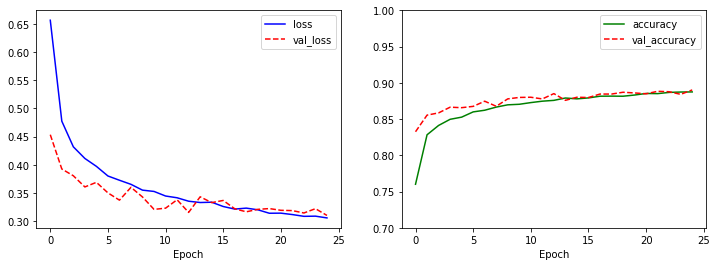

313/313 - 1s - loss: 0.3178 - accuracy: 0.8885 - 1s/epoch - 4ms/step


[0.3177969455718994, 0.8884999752044678]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_labels, verbose=2)

Reference:https://github.com/zalandoresearch/fashion-mnist#benchmark